In [1]:
#### check which version of python is used in Jupyter
import sys
print(sys.executable)

/Users/riyanandi/Desktop/ML/Apziva1/project1/bin/python


**EXPLORATORY DATA ANALYSIS**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

headers=['Happiness','On_time','content_as_expected','ordered_what_I_wanted','good_price','delivery_satisfaction','app_ease']
data=pd.read_csv('ACME-HappinessSurvey2020.csv',skiprows=1,names=headers)
data.head()

,Happiness,On_time,content_as_expected,ordered_what_I_wanted,good_price,delivery_satisfaction,app_ease
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Happiness              126 non-null    int64
 1   On_time                126 non-null    int64
 2   content_as_expected    126 non-null    int64
 3   ordered_what_I_wanted  126 non-null    int64
 4   good_price             126 non-null    int64
 5   delivery_satisfaction  126 non-null    int64
 6   app_ease               126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [4]:
# Set the float format to 2 decimal places
pd.options.display.float_format = '{:.2f}'.format
data.describe()

,Happiness,On_time,content_as_expected,ordered_what_I_wanted,good_price,delivery_satisfaction,app_ease
count,126.00,126.00,126.00,126.00,126.00,126.00,126.00
mean,0.55,4.33,2.53,3.31,3.75,3.65,4.25
std,0.50,0.80,1.11,1.02,0.88,1.15,0.81
min,0.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,0.00,4.00,2.00,3.00,3.00,3.00,4.00
50%,1.00,5.00,3.00,3.00,4.00,4.00,4.00
75%,1.00,5.00,3.00,4.00,4.00,4.00,5.00
max,1.00,5.00,5.00,5.00,5.00,5.00,5.00


**Descriptive statistics, central tendency and dispersion of the dataset**

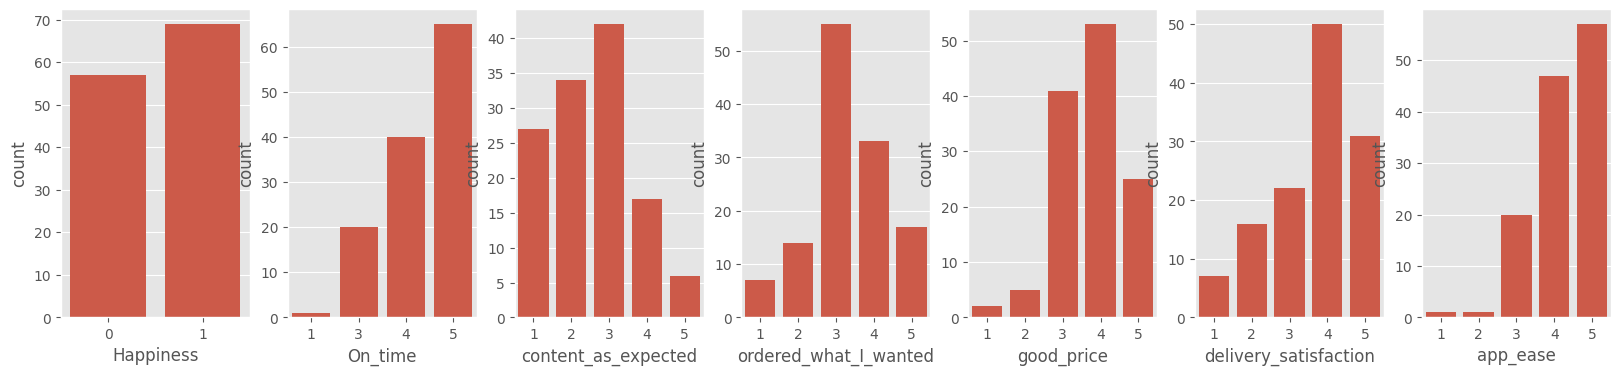

In [5]:
plt.figure(figsize=(20,4))

plt.subplot(1,7,1)
sns.countplot(x='Happiness',data=data)
plt.subplot(1,7,2)
sns.countplot(x='On_time',data=data)
plt.subplot(1,7,3)
sns.countplot(x='content_as_expected',data=data)
plt.subplot(1,7,4)
sns.countplot(x='ordered_what_I_wanted',data=data)
plt.subplot(1,7,5)
sns.countplot(x='good_price',data=data)
plt.subplot(1,7,6)
sns.countplot(x='delivery_satisfaction',data=data)
plt.subplot(1,7,7)
sns.countplot(x='app_ease',data=data)

# Show plot
plt.show()

**univariate analysis**
*histograms of counts of each feature and label*

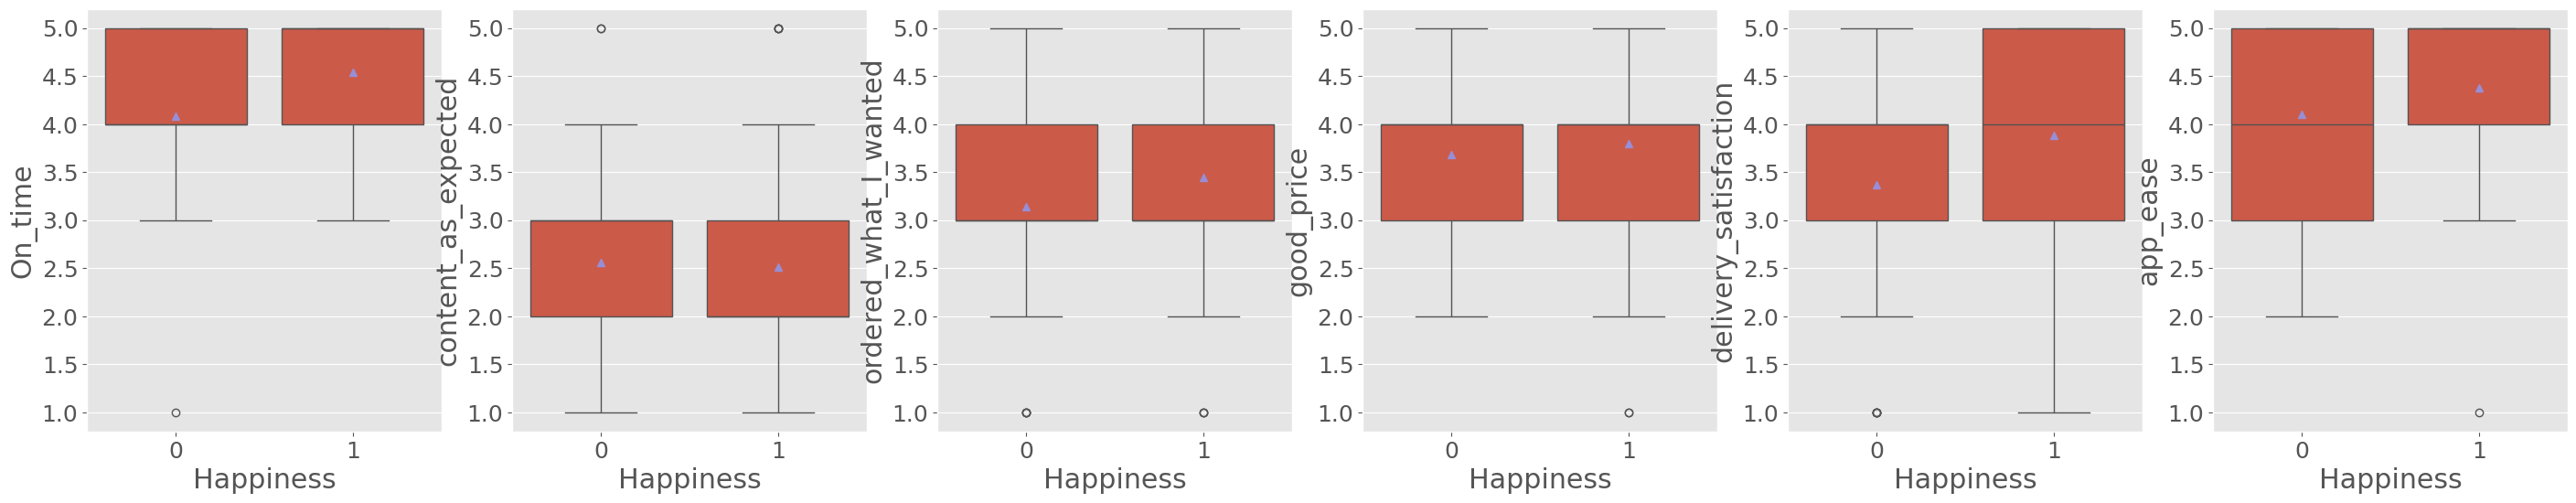

In [6]:
##bivariate analysis , relation between output and attributes

plt.figure(figsize=(35,6))
plt.rcParams.update({'font.size': 18})

plt.subplot(1,6,1)
sns.boxplot(x='Happiness',y='On_time',data=data,showmeans=True)
plt.subplot(1,6,2)
sns.boxplot(x='Happiness',y='content_as_expected',data=data,showmeans=True)
plt.subplot(1,6,3)
sns.boxplot(x='Happiness',y='ordered_what_I_wanted',data=data,showmeans=True)
plt.subplot(1,6,4)
sns.boxplot(x='Happiness',y='good_price',data=data,showmeans=True)
plt.subplot(1,6,5)
sns.boxplot(x='Happiness',y='delivery_satisfaction',data=data,showmeans=True)
plt.subplot(1,6,6)
sns.boxplot(x='Happiness',y='app_ease',data=data,showmeans=True)

# Show plot
plt.show()

**Bivariate analysis: relation between the output and attributes in histogram plot**

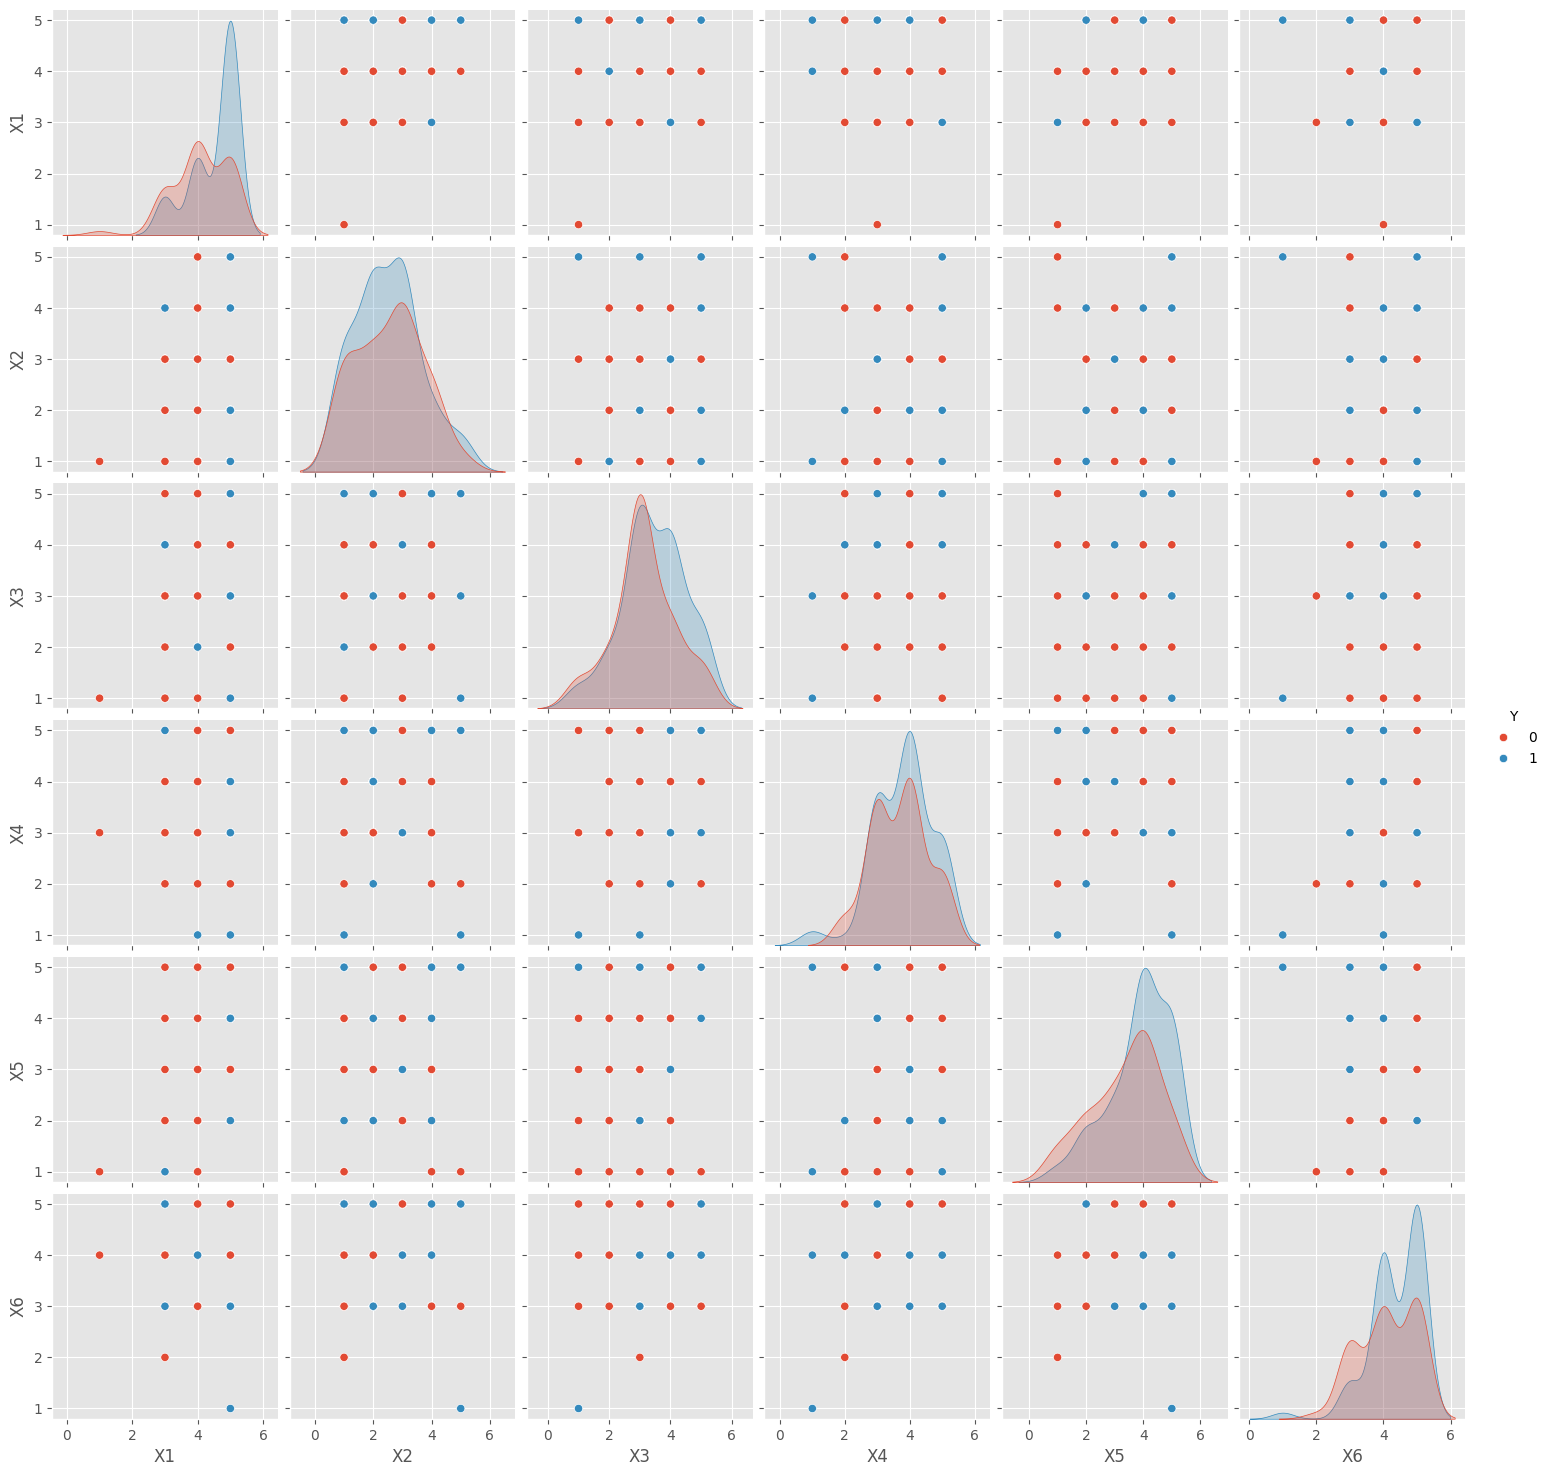

In [7]:
#pair plots (multivariate)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

headers=['Y','X1','X2','X3','X4','X5','X6']
data=pd.read_csv('ACME-HappinessSurvey2020.csv',skiprows=1,names=headers)

sns.pairplot(data,hue='Y')
plt.show()

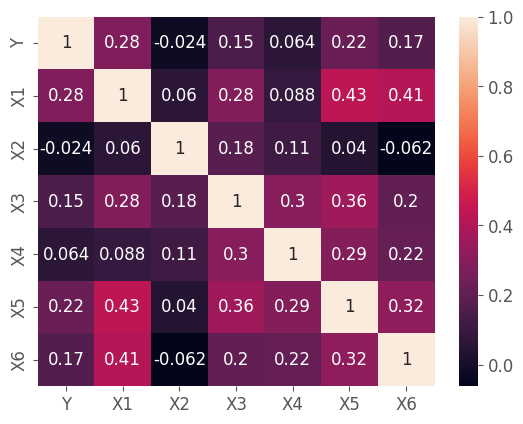

In [8]:
### plot correlations
plt.rcParams.update({'font.size': 12})
df_corr=data[['Y','X1','X2','X3','X4','X5','X6']].corr()
sns.heatmap(df_corr,annot=True)
plt.show()

*The output variable Y='Happiness' has significant positive correlations with some of the features such as X1, X3, X5 and X6. 
While the correlation coefficient between Y and X2/X4 is significantly close ot zero. This hints that all the features in the model may not be significant to the determination of the variable 'Y', feature importances should be investigated.*

**BUILDING ML MODEL**

In [76]:
#### Split the data into training and testing sets

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Assume the dataset has two attributes and one output
X = data[['X1','X2','X3','X4','X5','X6']]  
y = data['Y']
seed=267

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

print(f'training size:{X_train.shape}')
print(f'test size:{X_test.shape}')

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

training size:(94, 6)
test size:(32, 6)


In [32]:
##Lazy Classifier
import lazypredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
predictions

100%|███████████████████████████████████████████| 31/31 [00:00<00:00, 48.00it/s]

[LightGBM] [Info] Number of positive: 51, number of negative: 43
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000029 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 94, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.542553 -> initscore=0.170626
[LightGBM] [Info] Start training from score 0.170626
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,0.69,0.67,0.67,0.68,0.01
XGBClassifier,0.69,0.66,0.66,0.67,0.04
LinearDiscriminantAnalysis,0.66,0.65,0.65,0.66,0.01
LinearSVC,0.66,0.65,0.65,0.66,0.01
RidgeClassifier,0.66,0.65,0.65,0.66,0.01
RandomForestClassifier,0.66,0.64,0.64,0.65,0.11
NuSVC,0.66,0.64,0.64,0.65,0.01
LogisticRegression,0.62,0.63,0.63,0.63,0.01
RidgeClassifierCV,0.62,0.63,0.63,0.63,0.01


*Changing test size changes the rank of models, but tree-based classifiers such as DecisionTreeClassifier and XGB, are consistently better performing. Training data size chosen as 0.25.*

Best max_depth: 6
Best Accuracy: 0.71875
Best Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.57      0.64        14
           1       0.71      0.83      0.77        18

    accuracy                           0.72        32
   macro avg       0.72      0.70      0.70        32
weighted avg       0.72      0.72      0.71        32

Best Confusion Matrix:
[[ 8  6]
 [ 3 15]]


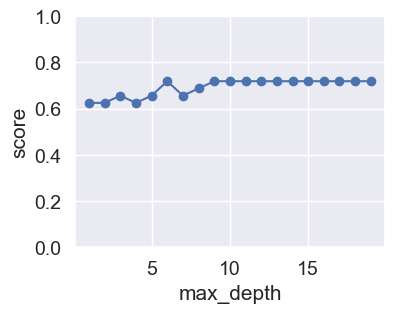

In [33]:
##### try a decision tree classifier
from sklearn.tree import DecisionTreeClassifier

plt.figure(figsize=(4,3))


depth_range = [i for i in range(1,20)]
models = []
scores = []
class_report=[]
best_score=-np.inf
best_model=None
best_depth=None


# Initialize the DecisionTreeClassifier with the specified parameters
for depth in depth_range:
    
    # Initialize the DecisionTreeClassifier with the current max_depth
    clf = DecisionTreeClassifier(
        criterion='gini',
        splitter='best',
        max_depth=depth,
        min_samples_split=2,
        min_samples_leaf=1,
        min_weight_fraction_leaf=0.0,
        max_features=None,
        random_state=seed,
        max_leaf_nodes=None,
        min_impurity_decrease=0.0,
        class_weight=None,
        ccp_alpha=0.0
    )
    
    #fit the model
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy)

    # Check if this is the best model so far
    if accuracy > best_score:
        best_model = clf
        best_score = accuracy
        best_report = classification_report(y_test, y_pred)
        best_conf_matrix = confusion_matrix(y_test, y_pred)
        best_depth = depth

    
# Print the results for the best model
print(f"Best max_depth: {best_depth}")
print(f"Best Accuracy: {best_score}")
print("Best Classification Report:")
print(best_report)
print("Best Confusion Matrix:")
print(best_conf_matrix)


# Generate the plot of scores against depth
plt.plot(depth_range, scores,'-o')

# Adjust labels and font (to make visable)
plt.xlabel("max_depth", fontsize = 15)
plt.ylabel("score", fontsize = 15)
plt.tick_params(labelsize = 14)
plt.ylim(0,1)

# Visualize plot
plt.show() 

*DecisionTree classifier already gives good accuracy for a range of max_depth parameter.*

*However, even in the best performing model, the recall is low. Model needs to be improved further.*

X1: 0.21935224284617882
X2: 0.13036402186330281
X3: 0.19072173023005387
X4: 0.14268510414357086
X5: 0.10244402339000037
X6: 0.21443287752689325


Text(0.5, 1.0, 'Feature Importance')

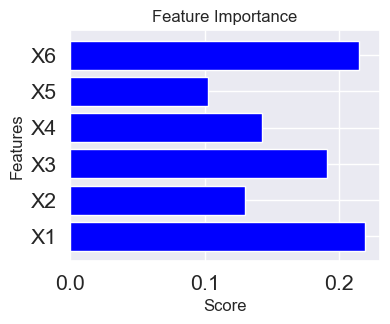

In [34]:
##check feature importances##
# Get feature importances
plt.figure(figsize=(4,3))

feature_importances = best_model.feature_importances_
feature_names = X.columns

# Print feature importances
for name, importance in zip(feature_names, feature_importances):
    print(f'{name}: {importance}')

# Visualize feature importances
plt.barh(feature_names, feature_importances, color='blue')
plt.xlabel('Score',fontsize=12)
plt.ylabel('Features',fontsize=12)
plt.title('Feature Importance',fontsize=12)

*Feature importances indicate some features such as X1 and X6 may be more important for better model performance. Next step is to systematically check by RFE*

In [35]:
### Recursive feature elimination 

from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold as KFold
from sklearn.feature_selection import RFE
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

results=[]

# Define the range for the number of features
n_features_range = range(1, 7)
k = 10

# Loop over the range of features
for n_features in n_features_range:
    
    # Define the pipeline
    pipeline = Pipeline([
        ('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=n_features)),
        ('classification', DecisionTreeClassifier(max_depth=6,random_state=seed,
                                                  criterion='gini',splitter='best'))])
    
    # Define the cross-validation procedure
    cv = KFold(n_splits=k, random_state=seed, n_repeats=3)
    
    # Fit the pipeline to get the selected features
    pipeline.fit(X_train, y_train)
    selected_features = np.array(feature_names)[pipeline.named_steps['feature_selection'].support_]
    
    # Evaluate the pipeline with cross-validation
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
    
    # Store the results
    results.append((n_features, scores.mean(), scores.std(), selected_features))


# Convert the results to a DataFrame for better readability
results_df = pd.DataFrame(results, columns=['n_features', 'mean_accuracy', 'std_accuracy','selected_features'])

# Print the results
print(results_df)

   n_features  mean_accuracy  std_accuracy         selected_features
0           1           0.54          0.14                      [X3]
1           2           0.57          0.15                  [X2, X5]
2           3           0.59          0.14              [X1, X2, X3]
3           4           0.54          0.14          [X1, X2, X3, X4]
4           5           0.55          0.13      [X1, X2, X3, X4, X6]
5           6           0.54          0.16  [X1, X2, X3, X4, X5, X6]


*Performing RFE+ K-fold cross-validation on DecisionTree classifier gives similar values of mean_accuracy for all combinations of features*

**TREE-BASED ENSEMBLE MODELS**

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.84      0.89      0.86        18

    accuracy                           0.84        32
   macro avg       0.84      0.84      0.84        32
weighted avg       0.84      0.84      0.84        32



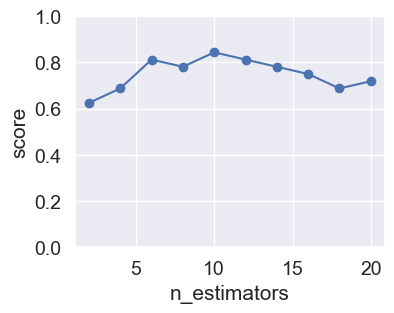

In [60]:
##### run the bagging classifier
plt.figure(figsize=(4,3))

from sklearn.ensemble import BaggingClassifier

estimator_range = [2,4,6,8,10,12,14,16,18,20]
models = []
scores = []
class_report=[]

for n_estimator in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators = n_estimator, random_state = seed)

    # Fit the model
    clf.fit(X_train, y_train)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))
    
    

# Find the index of the maximum score
best_est_index = np.argmax(scores)

# Choose the best estimator and print classification report
best_est=estimator_range[best_est_index]


clf = BaggingClassifier(n_estimators = best_est, random_state = seed)
clf.fit(X_train, y_train)
class_report=classification_report(y_true = y_test, y_pred = clf.predict(X_test))
print('Classification Report:')
print(class_report)


# Generate the plot of scores against number of estimators
plt.plot(estimator_range, scores,'-o')

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 15)
plt.ylabel("score", fontsize = 15)
plt.tick_params(labelsize = 14)
plt.ylim(0,1)

# Visualize plot
plt.show() 


*Bagging classifier gives very high accuracy of 84% with satisfactory precision and recall percentages*

*n_estimators= number of base classifiers/ decision trees that the model will aggregate, is a tunable hyperparameter of this model*

In [42]:
from sklearn.model_selection import GridSearchCV, ParameterGrid

# Define the hyperparameter space
n_estimators_space = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

# Define the model
clf = BaggingClassifier(random_state=seed)

# Define the grid space for n_estimators
grid_space = {'n_estimators': n_estimators_space}
grid = GridSearchCV(clf, param_grid=grid_space, cv=10, scoring='accuracy', n_jobs=-1)

# fit the training datasetn with the specifier grid of parameters
grid.fit(X_train, y_train)

#print the best set of parameters
print('GridSearchCV Best hyperparameters:', grid.best_params_)
print('GridSearchCV Best score:', grid.best_score_)

# Evaluate the best model from GridSearchCV on the test set
best_model = grid.best_estimator_

# Use the best_model on the test data to get a prediction
grid_accuracy = accuracy_score(y_true=y_test, y_pred=best_model.predict(X_test))

print('GridSearchCV Test set accuracy:', grid_accuracy)
print('GridSearchCV Classification Report:')
print(classification_report(y_true=y_test, y_pred=best_model.predict(X_test)))

GridSearchCV Best hyperparameters: {'n_estimators': 10}
GridSearchCV Best score: 0.6088888888888889
GridSearchCV Test set accuracy: 0.84375
GridSearchCV Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.84      0.89      0.86        18

    accuracy                           0.84        32
   macro avg       0.84      0.84      0.84        32
weighted avg       0.84      0.84      0.84        32



*This essentially reproduces the previous result that the best model performance is when the number of estimators is 10, when the model if fit on the test data, the values of accuracy, recall and precision all agress.*

*Scoring- mean accuracy score across all folds of cross-validation. This gives better measure of the model performance*


In [46]:
### Recursive feature elimination 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold as KFold
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score

results=[]

# Define the range for the number of features
n_features_range = range(1, 7)
k = 10
n_estimator=10

# Define the classifiers
clf_rfe = DecisionTreeClassifier(random_state=seed)
clf = BaggingClassifier(n_estimators=n_estimator,random_state=seed)

# Loop over the range of features
for n_features in n_features_range:
    
    # Define the pipeline
    pipeline = Pipeline([
        ('feature_selection', RFE(estimator=clf_rfe, n_features_to_select=n_features)),
        ('classification', clf)])
    
    # Define the cross-validation procedure
    cv = KFold(n_splits=k, random_state=seed, n_repeats=3)
    
    # Fit the pipeline to get the selected features
    pipeline.fit(X_train, y_train)
    selected_features = np.array(feature_names)[pipeline.named_steps['feature_selection'].support_]
    
    # Evaluate the pipeline with cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')
    
    # Store the results
    results.append((n_features, scores.mean(), scores.std(), selected_features))


# Convert the results to a DataFrame for better readability
results_df = pd.DataFrame(results, columns=['n_features', 'mean_accuracy', 'std_accuracy','selected_features'])

# Print the results
print(results_df)

# Find the set of features with the highest mean accuracy
best_result = results_df.loc[results_df['mean_accuracy'].idxmax()]

best_features = best_result['selected_features']
print("Best Features:", best_features)

# Convert best_features to a list
best_features_list = best_features.tolist()

# Convert X_train and X_test numpy arrays to DataFrames
feature_names=['X1','X2','X3','X4','X5','X6']
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Select the best features from the training and test sets
X_train_best = X_train_df[best_features_list]
X_test_best = X_test_df[best_features_list]

# Train the classifier with the best features
clf.fit(X_train_best, y_train)

# Predict and evaluate on the test set
y_pred = clf.predict(X_test_best)
class_report = classification_report(y_test, y_pred)

# Print the classification report
print('Classification Report:')
print(class_report)

   n_features  mean_accuracy  std_accuracy         selected_features
0           1           0.48          0.15                      [X3]
1           2           0.53          0.17                  [X1, X3]
2           3           0.56          0.17              [X1, X2, X3]
3           4           0.56          0.14          [X1, X2, X3, X6]
4           5           0.60          0.13      [X1, X2, X3, X5, X6]
5           6           0.56          0.14  [X1, X2, X3, X4, X5, X6]
Best Features: ['X1' 'X2' 'X3' 'X5' 'X6']
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.57      0.67        14
           1       0.73      0.89      0.80        18

    accuracy                           0.75        32
   macro avg       0.76      0.73      0.73        32
weighted avg       0.76      0.75      0.74        32



*excluding feature X4 does not improve the best_model accuracy, precision and recall.*

In [47]:
# Define the hyperparameter space
n_estimators_space = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
cv_space = [2, 3, 4, 5, 6, 7, 8, 9, 10]  

'''
# Generate a list of 10 random numbers for random_state
random_state_space = np.random.randint(0, 1000, size=50).tolist()

# Define the parameter grid for random_state and cv
param_grid = {'random_state': random_state_space, 'cv': cv_space}

# Use ParameterGrid to generate all combinations of random_state and cv
param_combinations = list(ParameterGrid(param_grid))
'''
best_score = -np.inf
best_params = None
best_model = None

# Iterate over cv space
for cv in cv_space:
    
    # Define the model
    clf = BaggingClassifier(random_state=seed)
    
    # Define the grid space for n_estimators
    grid_space = {'n_estimators': n_estimators_space}
    
    # Perform GridSearchCV
    grid = GridSearchCV(clf, param_grid=grid_space, cv=cv, scoring='accuracy', n_jobs=-1)
    model_grid = grid.fit(X_train, y_train)
    
    # Update the best score and best parameters if current model is better
    if model_grid.best_score_ > best_score:
        best_score = model_grid.best_score_
        best_params = {
            'n_estimators': model_grid.best_params_['n_estimators'],
            'cv': cv
        }
        best_model = model_grid.best_estimator_

# Print the best hyperparameters and the best score
print('Best hyperparameters are:', best_params)
print('Best score is:', best_score)

# Evaluate the best model on the test set
test_accuracy = accuracy_score(y_true=y_test, y_pred=best_model.predict(X_test))
print('Test set accuracy:', test_accuracy)

print('GridSearchCV Classification Report:')
print(classification_report(y_true=y_test, y_pred=best_model.predict(X_test)))

Best hyperparameters are: {'n_estimators': 16, 'cv': 9}
Best score is: 0.6303030303030304
Test set accuracy: 0.75
GridSearchCV Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        14
           1       0.78      0.78      0.78        18

    accuracy                           0.75        32
   macro avg       0.75      0.75      0.75        32
weighted avg       0.75      0.75      0.75        32



*K is another tunable parameter for the model determining the number of data splits that are being trained and tested. The best_score occurs for n_estimators=16 and K=9, which is picked as the best model. This model works well on the test data giving 75% accuracy.*

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Define the logistic regression with L1 regularization for feature selection
selector = SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear', random_state=seed))

# Define the Bagging classifier
clf = BaggingClassifier(n_estimators=16, random_state=seed)

# Define the pipeline
pipeline = Pipeline([
    ('feature_selection', selector),
    ('classification', clf)
])

# Define the cross-validation procedure
cv = RepeatedStratifiedKFold(n_splits=9, random_state=seed, n_repeats=3)

# Fit the pipeline to get the selected features
pipeline.fit(X_train, y_train)

# Get the mask of the selected features
selected_features_mask = pipeline.named_steps['feature_selection'].get_support()
print("Selected Features:", selected_features)

# Convert X_train and X_test numpy arrays to DataFrames
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Select the best features from the training and test sets
X_train_best = X_train_df[selected_features]
X_test_best = X_test_df[selected_features]

# Train the classifier with the best features
clf.fit(X_train_best, y_train)

# Predict and evaluate on the test set
y_pred = clf.predict(X_test_best)
class_report = classification_report(y_test, y_pred)

# Print the classification report
print('Classification Report:')
print(class_report)


Selected Features: ['X1' 'X2' 'X3' 'X4' 'X5' 'X6']
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        14
           1       0.78      0.78      0.78        18

    accuracy                           0.75        32
   macro avg       0.75      0.75      0.75        32
weighted avg       0.75      0.75      0.75        32



*Finally, confirmed that best choice is made with feature selection by running LosgissticRegression with L1 regularization, non of the coefficients vanish. The best model is still giving 75% accuracy with average f1-score of >75%.* 



**XGBOOST CLASSIFIER**



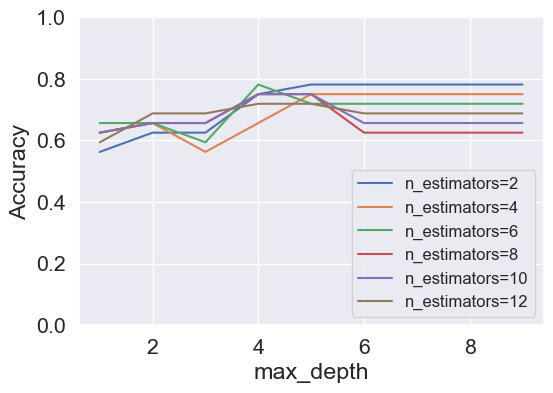

In [52]:
##### run the xgb classifier
from xgboost import XGBClassifier

plt.figure(figsize=(6,4))

estimator_range = [2,4,6,8,10,12]
depth_range = [i for i in range(1,10)]

for n_estimator in estimator_range:
    scores = []
    models = []
    for depth in depth_range:

        # Create extratree classifier
        xgb = XGBClassifier(n_estimators = n_estimator, max_depth=depth, learning_rate=1, objective='binary:logistic')

        # Fit the model
        xgb.fit(X_train, y_train)

        # Append the model and score to their respective list
        models.append(xgb)
        scores.append(accuracy_score(y_true = y_test, y_pred = xgb.predict(X_test))) 

    #plot
    plt.plot(depth_range,scores,label=f'n_estimators={n_estimator}')

    
#set axes labels
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend(loc='lower right',fontsize=12)
plt.ylim(0,1)
    
# Visualize plot
plt.show()  

*XGBOOST also gives promising results for the chosen training dataset, >75% accuracy*

In [55]:
##hyperparameter optimization Gridsearch and Randomsearch
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

#choose model
xgb=XGBClassifier(learning_rate=1, objective='binary:logistic')

search_space={'n_estimators':[2,4,6,8,10,12,14,16,None],
              'max_depth':[2,4,6,8,10,None]
           }

grid = GridSearchCV(xgb,param_grid=search_space,cv=4,scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("GRID SEARCH")
print('GridSearchCV Best hyperparameters:', grid.best_params_)
print('GridSearchCV Best score:', grid.best_score_)

# Evaluate the best model from GridSearchCV on the test set
best_model = grid.best_estimator_
grid_accuracy = accuracy_score(y_true=y_test, y_pred=best_model.predict(X_test))
print('GridSearchCV Test set accuracy:', grid_accuracy)
print('GridSearchCV Classification Report:')
print(classification_report(y_true=y_test, y_pred=best_model.predict(X_test)))

################ Random search ##############

xgb_random = RandomizedSearchCV(xgb, search_space, n_iter=200, scoring='accuracy', n_jobs=-1, cv=4)
model_random = xgb_random.fit(X_train,y_train)


print("RANDOM SEARCH")
print('Best hyperparameters are: '+str(model_random.best_params_))
print('Best score is: '+str(model_random.best_score_))

# Evaluate the best model from GridSearchCV on the test set
best_model = xgb_random.best_estimator_
random_accuracy = accuracy_score(y_true=y_test, y_pred=best_model.predict(X_test))
print('RandomSearchCV Test set accuracy:', random_accuracy)
print('RandomSearchCV Classification Report:')
print(classification_report(y_true=y_test, y_pred=best_model.predict(X_test)))

GRID SEARCH
GridSearchCV Best hyperparameters: {'max_depth': 2, 'n_estimators': 4}
GridSearchCV Best score: 0.5969202898550725
GridSearchCV Test set accuracy: 0.65625
GridSearchCV Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.79      0.67        14
           1       0.77      0.56      0.65        18

    accuracy                           0.66        32
   macro avg       0.67      0.67      0.66        32
weighted avg       0.69      0.66      0.65        32

RANDOM SEARCH
Best hyperparameters are: {'n_estimators': 4, 'max_depth': 2}
Best score is: 0.5969202898550725
RandomSearchCV Test set accuracy: 0.65625
RandomSearchCV Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.79      0.67        14
           1       0.77      0.56      0.65        18

    accuracy                           0.66        32
   macro avg       0.67      0.67      0.66        32
weighted

*Both search algorithms are consistent, giving the same value for best_parametes. However, the result is dependent on cv.*

X1: 0.4337880611419678
X2: 0.0901956856250763
X3: 0.23088814318180084
X4: 0.06464063376188278
X5: 0.11327485740184784
X6: 0.06721261143684387


Text(0.5, 1.0, 'Feature Importance')

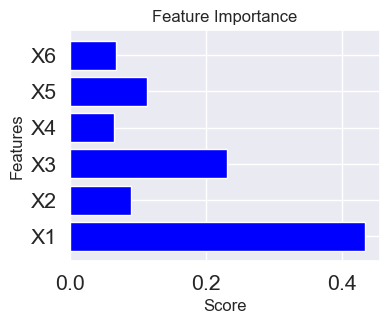

In [56]:
# Get feature importances
plt.figure(figsize=(4,3))

feature_importances = best_model.feature_importances_
feature_names = X.columns

# Print feature importances
for name, importance in zip(feature_names, feature_importances):
    print(f'{name}: {importance}')

# Visualize feature importances
plt.barh(feature_names, feature_importances, color='blue')
plt.xlabel('Score',fontsize=12)
plt.ylabel('Features',fontsize=12)
plt.title('Feature Importance',fontsize=12)

In [57]:
### Recursive feature elimination 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold as KFold
from sklearn.feature_selection import RFE
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

results=[]

# Define the range for the number of features
n_features_range = range(1, 7)
k = 4
n_estimator=4
max_depth=2

# Define the classifiers
clf = XGBClassifier(learning_rate=1, objective='binary:logistic',max_depth=2,n_estimators=4)

# Loop over the range of features
for n_features in n_features_range:
    
    # Define the pipeline
    pipeline = Pipeline([
        ('feature_selection', RFE(estimator=clf, n_features_to_select=n_features)),
        ('classification', clf)])
    
    # Define the cross-validation procedure
    cv = KFold(n_splits=k, random_state=seed, n_repeats=3)
    
    # Fit the pipeline to get the selected features
    pipeline.fit(X_train, y_train)
    selected_features = np.array(feature_names)[pipeline.named_steps['feature_selection'].support_]
    
    # Evaluate the pipeline with cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')
    
    # Store the results
    results.append((n_features, scores.mean(), scores.std(), selected_features))


# Convert the results to a DataFrame for better readability
results_df = pd.DataFrame(results, columns=['n_features', 'mean_accuracy', 'std_accuracy','selected_features'])

# Print the results
print(results_df)

# Find the set of features with the highest mean accuracy
best_result = results_df.loc[results_df['mean_accuracy'].idxmax()]

best_features = best_result['selected_features']
print("Best Features:", best_features)

# Convert best_features to a list
best_features_list = best_features.tolist()

# Convert X_train and X_test numpy arrays to DataFrames
feature_names=['X1','X2','X3','X4','X5','X6']
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Select the best features from the training and test sets
X_train_best = X_train_df[best_features_list]
X_test_best = X_test_df[best_features_list]

# Train the classifier with the best features
clf.fit(X_train_best, y_train)

# Predict and evaluate on the test set
y_pred = clf.predict(X_test_best)
class_report = classification_report(y_test, y_pred)

# Print the classification report
print('Classification Report:')
print(class_report)

   n_features  mean_accuracy  std_accuracy         selected_features
0           1           0.59          0.10                      [X1]
1           2           0.57          0.06                  [X1, X3]
2           3           0.54          0.04              [X1, X2, X3]
3           4           0.55          0.05          [X1, X2, X3, X6]
4           5           0.56          0.06      [X1, X2, X3, X5, X6]
5           6           0.53          0.06  [X1, X2, X3, X4, X5, X6]
Best Features: ['X1']
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.64      0.60        14
           1       0.69      0.61      0.65        18

    accuracy                           0.62        32
   macro avg       0.62      0.63      0.62        32
weighted avg       0.63      0.62      0.63        32



*Best feature is X1, agreeing with the feature importance plot. However, just selecting one feature does not improve model performace on the test data*

In [70]:
######## check the best cv parameter #######
print("XGBoost")

# Define the hyperparameter space
cv_space = [2, 3, 4, 5, 6, 7]  

best_score = -np.inf
best_params = None
best_model = None

# Iterate over cv space
for cv in cv_space:
    
    #choose model
    xgb=XGBClassifier(learning_rate=1, objective='binary:logistic')

    search_space={'max_depth':[2,4,6,8,10,None],
              'n_estimators':[2,4,6,8,10,12,14,16,None]
           }
    
    
    # Perform GridSearchCV
    grid = GridSearchCV(xgb, param_grid=search_space, cv=cv, scoring='accuracy', n_jobs=-1)
    model_grid = grid.fit(X_train, y_train)
    
    # Update the best score and best parameters if current model is better
    if model_grid.best_score_ > best_score:
        best_score = model_grid.best_score_
        best_params = {
            'max_depth': model_grid.best_params_['max_depth'],
            'n_estimators': model_grid.best_params_['n_estimators'],
            'cv': cv
        }
        best_model = model_grid.best_estimator_

# Print the best hyperparameters and the best score
print('Best hyperparameters are:', best_params)
print('Best score is:', best_score)

# Evaluate the best model on the test set
test_accuracy = accuracy_score(y_true=y_test, y_pred=best_model.predict(X_test))
print('Test set accuracy:', test_accuracy)

print('GridSearchCV Classification Report:')
print(classification_report(y_true=y_test, y_pred=best_model.predict(X_test)))

XGBoost
Best hyperparameters are: {'max_depth': 4, 'n_estimators': 2, 'cv': 2}
Best score is: 0.6489361702127661
Test set accuracy: 0.75
GridSearchCV Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.64      0.69        14
           1       0.75      0.83      0.79        18

    accuracy                           0.75        32
   macro avg       0.75      0.74      0.74        32
weighted avg       0.75      0.75      0.75        32



**The final model chosen with XGBOOST performs very similar to the Bagging classifier, with Bagging classifier having better f1-score.**

>lr 0.525 (0.125)
>cart 0.511 (0.138)
>svm 0.521 (0.126)
>stacking 0.501 (0.137)


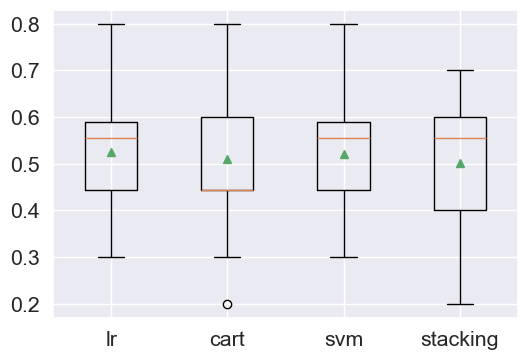

Stacking Model Accuracy: 0.688
classification_report:
              precision    recall  f1-score   support

           0       0.70      0.50      0.58        14
           1       0.68      0.83      0.75        18

    accuracy                           0.69        32
   macro avg       0.69      0.67      0.67        32
weighted avg       0.69      0.69      0.68        32



In [94]:
plt.figure(figsize=(6,4))

## ensemble learning stacking
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
 
# Function to get a stacking ensemble of models
def get_stacking():
    # Define the base models
    level0 = [
        ('lr', LogisticRegression()),
        ('cart', DecisionTreeClassifier()),
        #('knn', KNeighborsClassifier()),
        #('svm', SVC(probability=True)),
        ('svm', LinearSVC()),
        #('bayes', GaussianNB())
    ]
    
    # Define meta learner model
    level1 = LogisticRegression()
    
    # Define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=2)
    return model
 
# Function to get a list of models to evaluate
def get_models():
    models = {
        'lr': LogisticRegression(),
        'cart': DecisionTreeClassifier(),
        #'knn': KNeighborsClassifier(),
        #'svm': SVC(),
        'svm': LinearSVC(),
        #'bayes': GaussianNB(),
        'stacking': get_stacking()
    }
    return models
 
# Function to evaluate a given model using cross-validation
def evaluate_model(model, X_train, y_train):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

 
# get the models to evaluate
models = get_models()


# Evaluate the models and store results
results, names = [], []
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

# Plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

# Train the stacking model on the entire training dataset
stacking_model = get_stacking()
stacking_model.fit(X_train, y_train)

# Predict the test set using the stacking model
y_pred = stacking_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print('Stacking Model Accuracy: %.3f' % accuracy)
print('classification_report:')
print(classification_report(y_true=y_test, y_pred=stacking_model.predict(X_test)))

In [118]:
#### voting classifier
from sklearn.ensemble import VotingClassifier

estimator = []
estimator.append(('LR', LogisticRegression(solver ='lbfgs', multi_class ='multinomial', max_iter = 100)))
#estimator.append(('SVC', LinearSVC()))
estimator.append(('DTC', DecisionTreeClassifier(random_state=seed,criterion='gini',splitter='best')))
estimator.append(('bag', BaggingClassifier(n_estimators=10, random_state=seed)))
#estimator.append(('xgb', XGBClassifier(learning_rate=1, objective='binary:logistic',max_depth=4,n_estimators=2)))
#estimator.append(('KNN', KNeighborsClassifier()))
#estimator.append(('GNB', GaussianNB()))

Hard = VotingClassifier(estimators = estimator, voting ='hard')
Hard.fit(X_train, y_train)
y_pred = Hard.predict(X_test)

score = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print('score:',score)
print('classification report:')
print(class_report)

score: 0.8125
classification report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.83      0.83      0.83        18

    accuracy                           0.81        32
   macro avg       0.81      0.81      0.81        32
weighted avg       0.81      0.81      0.81        32



In [119]:
#### soft voting
Soft = VotingClassifier(estimators = estimator, voting ='soft')
Soft.fit(X_train, y_train)
y_pred = Soft.predict(X_test)

score = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print('score:',score)
print('classification report:')
print(class_report)

score: 0.75
classification report:
              precision    recall  f1-score   support

           0       0.75      0.64      0.69        14
           1       0.75      0.83      0.79        18

    accuracy                           0.75        32
   macro avg       0.75      0.74      0.74        32
weighted avg       0.75      0.75      0.75        32



**BEST_MODEL giving the best prediction in the test dataset: Voting Classifier, with LR, DT, and Bagging classifiers.**

*Some other models*

                         Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression (lbfgs)      0.66       0.71    0.67      0.69
Test Data Accuracy: 0.6562


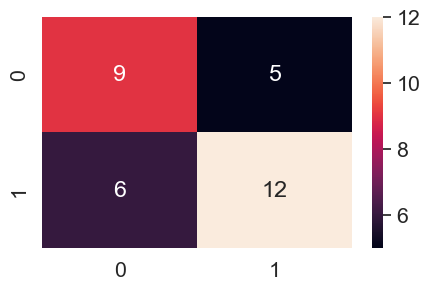

In [121]:
#Model Building (Logistic Regression)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

#classifier = LogisticRegression(random_state=seed, penalty='l1',solver='liblinear')
classifier = LogisticRegression(random_state=seed,solver ='lbfgs', multi_class ='multinomial', max_iter = 200)
classifier.fit(X_train, y_train)

#Predicting Test set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
#results = pd.DataFrame([['Logistic Regression (Lasso)', acc,prec,rec,f1]],columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
results = pd.DataFrame([['Logistic Regression (lbfgs)', acc,prec,rec,f1]],columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
print(results)

##Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (5,3))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred)) 

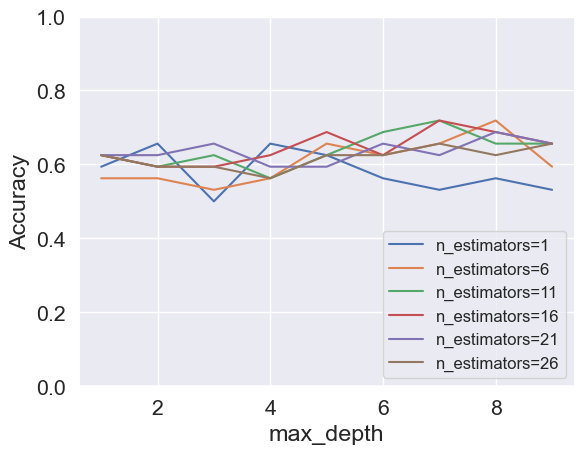

In [122]:
###RandomForestClassifier(n_estimators=n, random_state=a)
#n #of decision trees 
from sklearn.ensemble import RandomForestClassifier

estimator_range = [i for i in range(1,30,5)]
depth_range = [i for i in range(1,10)]

for estimator in estimator_range:
    scores = []
    models = []
    for depth in depth_range:
        rdf = RandomForestClassifier(n_estimators=estimator,max_depth=depth, random_state=seed)
        # Fit the model
        rdf.fit(X_train, y_train)

        # Append the model and score to their respective list
        models.append(rdf)
        scores.append(accuracy_score(y_true = y_test, y_pred = rdf.predict(X_test))) 

    #plot
    plt.plot(depth_range,scores,label=f'n_estimators={estimator}')

    # Find the index of the maximum score
    best_index = np.argmax(scores)

    # Choose the best depth and print classification report
    best_depth=depth_range[best_index]


    clf = RandomForestClassifier(n_estimators = estimator,max_depth=best_depth, random_state = seed)
    clf.fit(X_train, y_train)
    class_report=classification_report(y_true = y_test, y_pred = clf.predict(X_test))
    #print(f'estimator={estimator},depth={best_depth}')
    #print(class_report)
    
    
#set axes labels
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend(loc='lower right',fontsize=12)
plt.ylim(0,1)
        
# Visualize plot
plt.show()  